In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [2]:
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3),axis=0) 
y = np.concatenate((y1,y2,y3),axis=0) 

dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,27.847502,29.404922
1,18.137327,24.146343
2,14.094734,23.680299
3,23.630847,30.443627
4,27.462137,20.043166


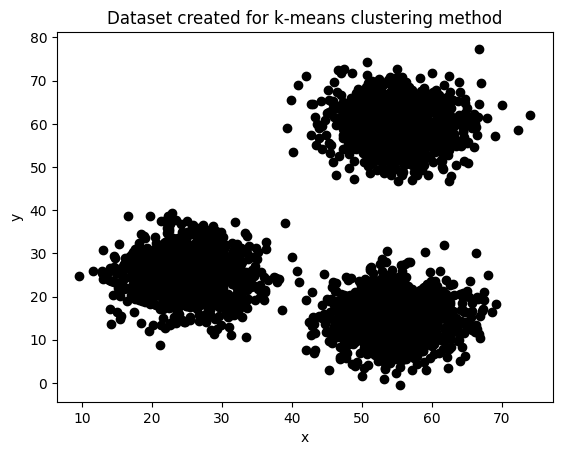

In [3]:
plt.figure()
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.scatter(x3,y3,color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset created for k-means clustering method")
plt.show()

In [4]:
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans .fit(data)
    wcss.append(kmeans.inertia_)

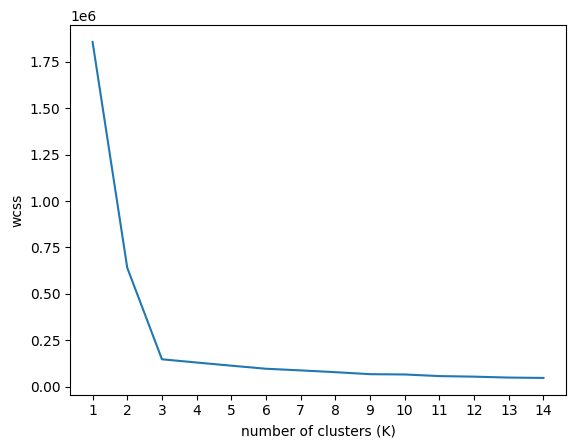

In [5]:
plt.figure()
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("number of clusters (K)")
plt.ylabel("wcss")
plt.show()

In [6]:
k_means = KMeans(n_clusters=3)

In [7]:
clusters = k_means.fit_predict(data)

In [8]:
data["label"] = clusters

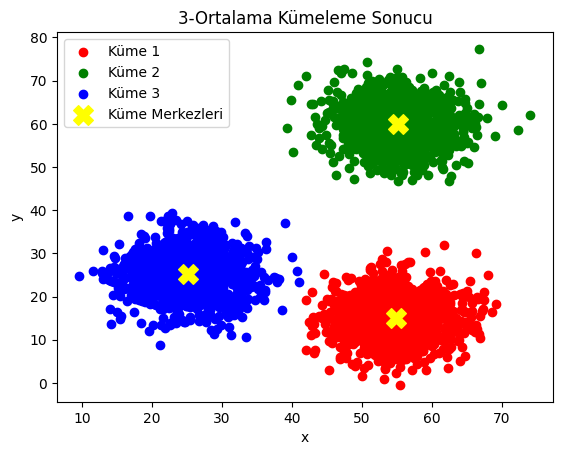

In [9]:
plt.figure()

plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color="red", label="Küme 1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color="green", label="Küme 2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color="blue", label="Küme 3")

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], 
            c="yellow", s=200, marker="X", label="Küme Merkezleri")

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Ortalama Kümeleme Sonucu")

plt.show()


In [10]:
np.random.seed(42)
X = np.random.rand(100,2)

In [11]:
def k_means(X, k, max_iters=100): 
    centroids = X[np.random.choice(range(len(X)),size=k,replace=False)] #replace = False, her merkez noktası en fazla bir kez seçilebilir

    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:,np.newaxis]-centroids,axis=2),axis=1) #en düşük mesafeyi alan merkezi atar

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids,labels

In [12]:
distortions = []
inertias = []

K = range(1,10)

In [13]:
for k in K:
    centroids, labels = k_means(X, k)

    distortions.append(sum(np.min(cdist(X, centroids, 'euclidean'), axis=1)) / X.shape[0])

    inertia = np.sum((X - centroids[labels]) ** 2)
    inertias.append(inertia)

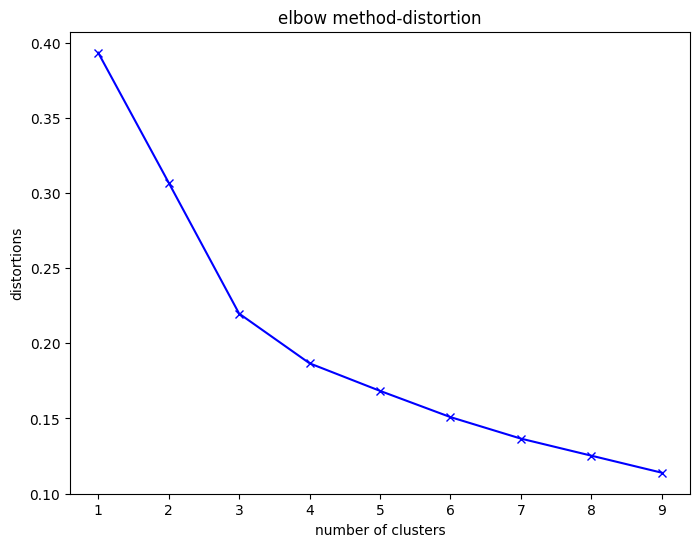

In [14]:
plt.figure(figsize=(8,6))
plt.plot(K,distortions,"bx-")
plt.xlabel("number of clusters")
plt.ylabel("distortions")
plt.title("elbow method-distortion")
plt.show()

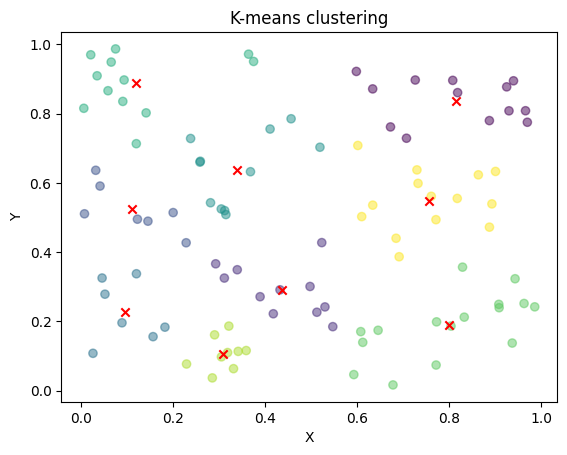

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="x")
plt.title("K-means clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()